SETUP OR FETCH our ENV VARIABLES

In [2]:
import os

# Groq (model provider)
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

# Search API keys
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

print("Keys set!")


Keys set!


In [3]:
from langchain.chat_models import init_chat_model

# Use Groq LLM
model = init_chat_model(
    model="groq:llama-3.3-70b-versatile",  # Large model for tool calling
    temperature=0.3   # creative 
)

print("LLM initialized:", model)


LLM initialized: profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True} client=<groq.resources.chat.completions.Completions object at 0x0000024A7F873490> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000024A7F9DEF10> model_name='llama-3.3-70b-versatile' temperature=0.3 model_kwargs={} groq_api_key=SecretStr('**********')


SEARCH FUNCTIONALITY

In [4]:
from langchain_tavily import TavilySearch

tavily_search = TavilySearch(
    max_results=5,
    topic="general"
)

print("Tavily search tool ready")


Tavily search tool ready


c:\Users\djadh\Downloads\Projects\aitravelplanner\travenv\Lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]
c:\Users\djadh\Downloads\Projects\aitravelplanner\travenv\Lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]


In [7]:
tavily_search.invoke({"query": "Give me latest ai news as of 2026"})

{'query': 'Give me latest ai news as of 2026',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.reddit.com/r/accelerate/comments/1qe7r91/oneminute_daily_ai_news_1152026/',
   'title': 'One-Minute Daily AI News 1/15/2026 : r/accelerate - Reddit',
   'content': 'Wikipedia inks AI deals with Microsoft, Meta and Perplexity as it marks 25th birthday.[1]. AI journalism startup Symbolic.ai signs deal with',
   'score': 0.8559598,
   'raw_content': None},
  {'url': 'https://www.technologyreview.com/2026/01/05/1130662/whats-next-for-ai-in-2026/',
   'title': "What's next for AI in 2026 | MIT Technology Review",
   'content': "What's next for AI in 2026 · More Silicon Valley products will be built on Chinese LLMs · The US will face another year of regulatory tug-of-war.",
   'score': 0.8025714,
   'raw_content': None},
  {'url': 'https://news.microsoft.com/source/features/ai/whats-next-in-ai-7-trends-to-watch-in-2026/',
   'title': "What's next in A

In [5]:
from langchain_community.utilities import GoogleSerperAPIWrapper

google_search = GoogleSerperAPIWrapper()

print("Google Serper wrapper ready")

Google Serper wrapper ready


test google serper

In [6]:
result = google_search.run("best places to visit in Kasol travel guide")
print(result)

What are the places to see around Kasol? · Manikaran – Amongst the many villages, Kasol to Manikaran would make for a good day's visit. · Chalal – ... Top Attractions in Kasol ; 1. Sar Pass Trek · 4.9. (14). Hiking Trails ; 2. Parvati Valley. Mountains ; 4. Ayur Spa · 4.8. (5). Spas ; 5. Psychedelic Painting Shop. Stay near Parvati river - lots of stays - some campsites as well. If you like to trek - Kheerganga is good, crowded yes but beautiful, if you do ... The ultimate guide to places to visit near Kasol, doing treks near Kasol, Kheerganga, Parvati Valley, Manikaran. 1. Nature Park. Just beside the Parvati Valley is one of the best places to visit in Kasol. Yes, we are talking about the nature park that ... Discover the best places to visit in Kasol—rivers, treks, villages, cafés & culture. Your complete travel guide to Mini Israel of India with tips ... Your Kasol trip itinerary must include treks and treads to journey some amazing places near Kasol; such as Sar Pass, Yanker Pass,

In [8]:

def tavily_search_tool(query: str) -> str:
    """
    Search the web using Tavily for travel info, tips, attractions, etc.
    """
    # Call the existing TavilySearch tool underneath
    return tavily_search.invoke({"query": query})


def google_serper_search_tool(query: str) -> str:
    """
    Search the web using Google Serper for up-to-date travel info.
    """
    return google_search.run(query)



In [9]:
tavily_search_tool("Plan a trip to india")

{'query': 'Plan a trip to india',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.zicasso.com/a/india/faq',
   'title': 'How to Plan a Trip to India: Frequently Asked Questions - Zicasso',
   'content': 'Whether you visit south India to find beautiful heritage and distinctive culture, architecture and nature, or travel to north India to discover the popular Rajasthan region and Varanasi, 10 days give you enough time to uncover the country’s unique highlights. ## What should I do on my trip to India? India is one of the world’s most unique wildlife-viewing destinations and travelers can see tigers, snow leopards, an assortment of endemic birds, and colorful sea life when visiting national parks, wildlife sanctuaries, and coral systems. ## How do I travel around India? When planning your trip, our India travel specialists will arrange transportation according to your preferences. India is very safe for travelers. Our India travel specialist

In [10]:
# testing the funcitonality 

google_serper_search_tool("Plan a 5 trip to india")

"This five-day tour includes the best of India's Golden Triangle (Delhi, Agra, and Jaipur), including the Taj Mahal, the Red Fort, Jaipur's City Palace, and lots ... We spent 5 Days in India's Tourist Triangle (Delhi, Agra, and Jaipur)! In this video we share our experiences in India and give tips to plan ... We are planning for a 5-6 days trip but kinda not sure on which part of India we should explore. Mostly want to have a quiet time with small treks and good ... Traveling 5 days in India? Explore India in 5 days with these unique India 5-day itinerary recommendations. Visit Goa, Jaipur, Delhi and Ranthambore! Hi all. We are travelling to India for approximately 5weeks including flights there and back. The following is our itinerary:. Day 1: Arrival in Delhi – The Heart of India · Day 2: Delhi Continued · Day 3: Delhi to Agra – The City of Taj Mahal · Day 4: Agra to Jaipur – The ... If you're arriving in Delhi I would suggest going to Agra for the Taj Mahal, Red Fort and a day trip 

In [11]:
from langchain.agents import create_agent

system_prompt = """
You are a travel planner assistant. User asks travel queries like
'plan my trip to X', 'what to do in Y hotel', etc.
Always use the available web search tools (TavilySearch, GoogleSerperSearch)
to look up latest real-world travel info. Provide a helpful and clear itinerary/answers.
"""


Travel planner agent ready!


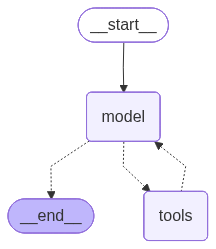

In [12]:
agent = create_agent(
    model=model,
    tools=[tavily_search_tool , google_serper_search_tool],
    system_prompt=system_prompt.strip()  # instructions
)

print("Travel planner agent ready!")
agent

TESTT TIME

In [13]:
response = agent.invoke({
    "messages": [
        {"role": "user", "content": "Give me a 3 day plan for Kasol travel with places to see."}
    ]
})

print("Agent answer:\n")
print(response)


Agent answer:

{'messages': [HumanMessage(content='Give me a 3 day plan for Kasol travel with places to see.', additional_kwargs={}, response_metadata={}, id='117ae305-370a-4601-a0fd-8b37626319b7'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'h7jbnwfwq', 'function': {'arguments': '{"query":"Kasol travel plan 3 days"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 'wsfp5596a', 'function': {'arguments': '{"query":"places to visit in Kasol"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 391, 'total_tokens': 437, 'completion_time': 0.096968041, 'completion_tokens_details': None, 'prompt_time': 0.038447197, 'prompt_tokens_details': None, 'queue_time': 0.160753963, 'total_time': 0.135415238}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3272ea2d91', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 

In [14]:
response["messages"]

[HumanMessage(content='Give me a 3 day plan for Kasol travel with places to see.', additional_kwargs={}, response_metadata={}, id='117ae305-370a-4601-a0fd-8b37626319b7'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'h7jbnwfwq', 'function': {'arguments': '{"query":"Kasol travel plan 3 days"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': 'wsfp5596a', 'function': {'arguments': '{"query":"places to visit in Kasol"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 391, 'total_tokens': 437, 'completion_time': 0.096968041, 'completion_tokens_details': None, 'prompt_time': 0.038447197, 'prompt_tokens_details': None, 'queue_time': 0.160753963, 'total_time': 0.135415238}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_3272ea2d91', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bc7

In [15]:
final_answer = response["messages"][-1].content
print(final_answer)

Here's a 3-day plan for Kasol travel with places to see:

Day 1: Arrival and Kasol Sightseeing
- Arrive in Kasol and check into your hotel or campsite
- Visit the Kasol market and explore the colorful shops and cafes
- Trek to Chalal Village and enjoy the scenic views of the Parvati Valley
- Visit the Gurudwara Shri Manikaran Sahib and take a dip in the hot springs

Day 2: Trekking and Exploration
- Trek to Kheerganga, a 12 km trek that takes 7-8 hours to reach from Bharsaini
- Enjoy the scenic views of the Himalayas and the Parvati Valley
- Visit the quaint villages of Kalga, Pulga, and Tulga
- Explore the Himalayan National Park and spot some wildlife

Day 3: Relaxation and Departure
- Spend the day relaxing in Kasol and enjoying the scenic views
- Visit the Psychedelic Painting Shop and explore the local art scene
- Take a hike to Malana Village and explore the ancient village
- Depart for Delhi in the evening, reaching by Monday morning

This itinerary provides a mix of trekking, e